DS 3000

# Team 39: Predicting Trending Fashion Videos through TikTok

## Bayden Ibrahim, Kush Raimalani, Anjali Tanna, and Xinwen Zhang

1. (.5%) Expresses the central motivation of the project in one or two sentences. This may evolve a bit through the project.

2. (1%) Gives a summary of the data processing pipeline so a technical expert can easily follow along

3. (4%) Obtains, cleans, and merges all data sources involved in the project

4. (2.5%) Builds two visualizations (graphs) from the data which characterize the distribution of the data itself in some interesting way. Your visualizations will be graded based on how much information they can effectively communicate with readers. Please make sure your visualizations are sufficiently distinct from each other.

5. (2%) Discuss what ML tools will be used and the relevant assumptions required to apply each. Either:
    - discuss why one algorithm may be chosen over the others

    - describe what subset of a whole suite of similar algorithms you’ll apply (its ok to say, ‘we’re going to try all of these because we don’t have reason to think one should be better than another’)

## Central Motivation

This work will obtain data from TikTok via web scraping using information from [this video](https://www.youtube.com/watch?v=7AAwtCR7f4w) and [this site](https://stevesie.com/apps/tiktok-api) to predict what features determine whether fashion (using videos under `#fashiontrends`) videos become popular or not. A possible usage for this project would be for fashion companies interested in marketing on TikTok to grasp what kinds of features are associated with video popularity. 

## Data Processing Pipeline

### Extraction
Extracting data from TikTok's main page without signing into an account proved to be insufficient as there were no "unpopular" videos featured. In order to extract videos we deemed as "unpopular" without adding in user bias, we decided to search for videos under a single hashtag (`#fashiontrends`). This method provides videos with a wide range of popularity regardless of whose account the search is under. 

After scrolling through a sufficient number of TikTok videos, we downloaded the `.har` file from the network tab. Using the [site mentioned above](https://stevesie.com/apps/tiktok-api), we exported the data as a `json` file before loading into python as a `DataFrame` for cleanup. 

### Transformation
The resulting dataframe contained the `statusCode`, `itemList`, `cursor`, and `hasMore`, where each `itemList` contained over 100 attributes for a single video. Each video was cleaned by collecting the following features: 

- vidId
- caption
- hashtags
- duration
- authorId
- uniqueId
- verified
- privateAccount
- musicId
- musicTitle
- likeCount
- shareCount
- commentCount
- playCount
- followingCount
- followerCount
- videoCount
- isAd

### Loading
The clean data is stored in a newly initialized dataframe `df_tiktok` for analysis. 

## Data

In [23]:
# Extraction
import pandas as pd

df = pd.read_json('NEWTTDATA.json')
df.head()

,statusCode,itemList,cursor,hasMore
0,0,"{'id': '7004421700007841030', 'desc': 'Septemb...",1860,True
1,0,"{'id': '7058583535610809605', 'desc': 'je fais...",1860,True
2,0,"{'id': '6988932280295230725', 'desc': 'trends ...",1860,True
3,0,"{'id': '6993764316159741190', 'desc': 'gimme g...",1860,True
4,0,"{'id': '6977481930044493061', 'desc': 'Reply t...",1860,True


In [24]:
len(df)

1917

In [25]:
df_tiktok.head(3)

,vidId,caption,hashtag,duration (s),authorId,uniqueId,verified,privateAccount,musicId,musicTitle,likeCount,shareCount,commentCount,playCount,followingCount,followerCount,videoCount,isAd
0,7004421700007841030,September must have!!! PART 1🤎 #fashionhacks #...,"[fashionhacks, fashiontrends]",31.0,6563206248362999813,_emmaaasss,0.0,False,6709415906423867393,Sex and the City (Main Theme),12200.0,24.0,38.0,68300.0,831.0,222600.0,858.0,False
1,7058583535610809605,je fais quelle couleur ensuite guys ? 💖😘 @clai...,"[@clairelatour, tiktokfashion, mode, conseilsm...",14.0,6647813383222394885,clairelatour,False,False,6863118485925398530,Baby Work It,6123.0,9.0,60.0,57100.0,403.0,391600.0,896.0,False
2,6988932280295230725,trends to invest in…because they’ll be here fo...,"[fashiontrends, fashiontrends2021, 2022fashion...",10.0,6714077600156828678,rachelnoelleclark,False,False,6979312907339254533,son original,6032.0,116.0,16.0,59700.0,225.0,202600.0,603.0,False


## Visualizations

### Pair Plot

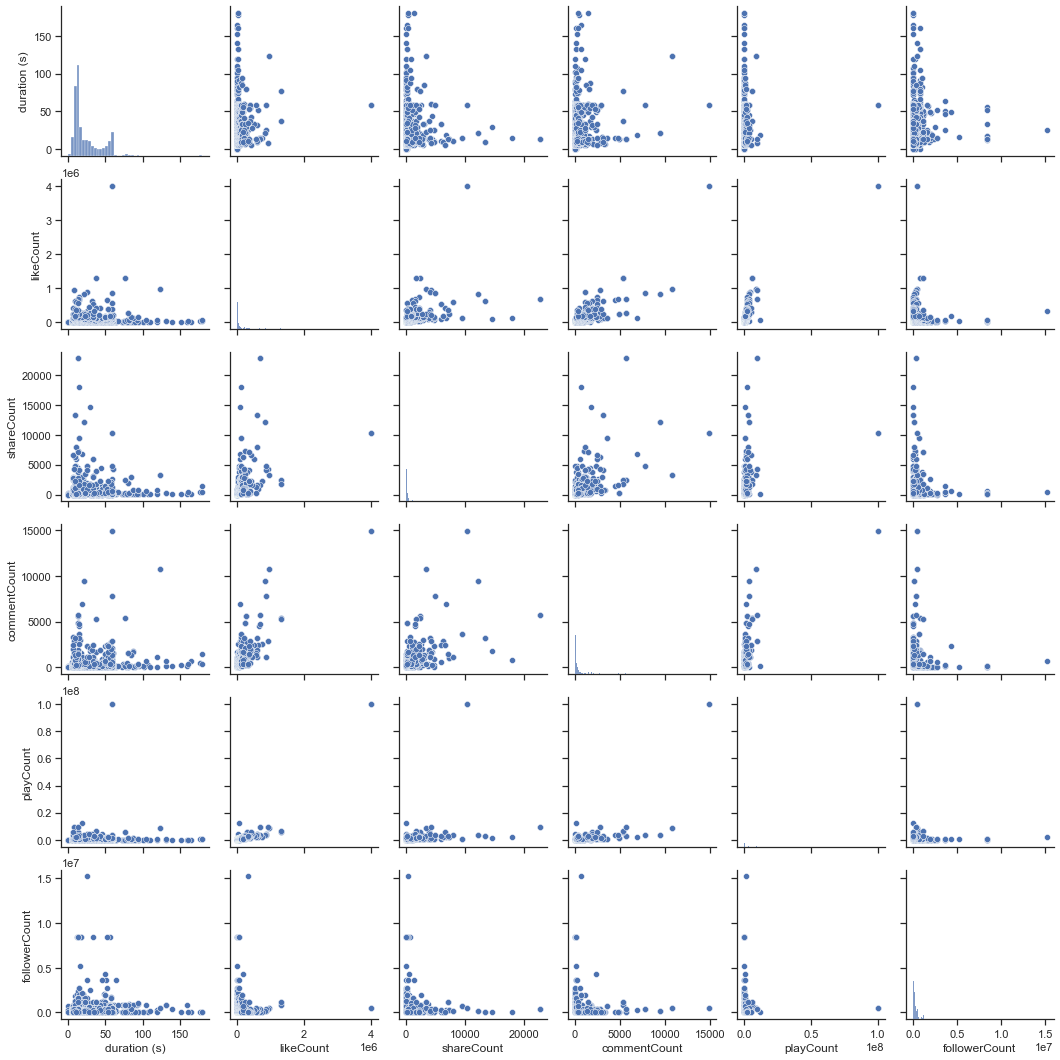

In [30]:
import seaborn as sns

# set theme of pairplot
sns.set_theme(style="ticks")

# plot pairplot
pairplot = sns.pairplot(df_tiktok, vars = ['duration (s)', 'likeCount', 'shareCount', 
                                           'commentCount', 'playCount', 'followerCount'])

The pairplot shows the relationships between features such as duration, likes, shares, comments, views, and followers. For most features, each plot should show a positive relationship. For example, as the number of likes increase, comments, views, and shares will most likely increase as well. However, with duration, features like views might decrease as people are less likely to pay attention to a longer video, let alone play it multiple times. 

Those are the hypothetical results, however, the plot here appears to be heavily distributed either towards the bottom left corner, or shows a negative relationship. We believe that this is due to unequally distributed data. Most of the videos are "unpopular", so the data is misrepresentative of actual content on TikTok. 

As such, we will be trying different hashtags to hopefully obtain a more well-distributed dataset and ameliorate this issue. The supplemental histogram below shows the distribution of likes in the current dataset. 

Text(0.5, 0.98, 'distribution of likes')

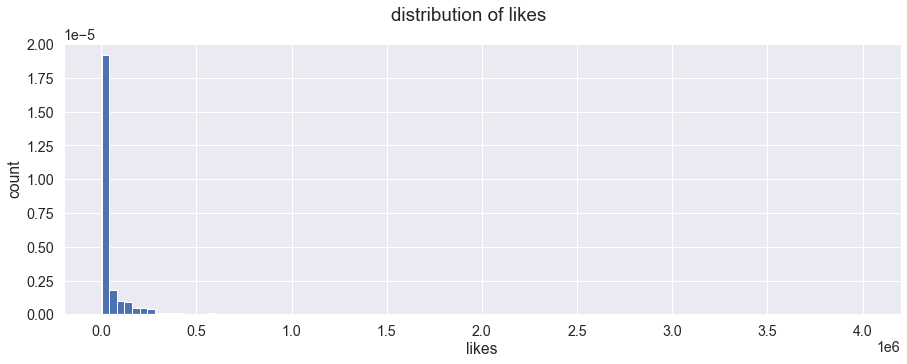

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set(font_scale = 1.3)

# set figure size
plt.figure(figsize = [15, 5])

# set bins
bins = 100

# plot histogram
plt.hist(df_tiktok['likeCount'], density = True, bins = bins)

# label axes
plt.xlabel('likes')
plt.ylabel('count')

# label title
plt.suptitle('distribution of likes')

### Correlation Matrix

In [7]:
# dataframe with only hashtags

df_hashtags = pd.DataFrame()
df_hashtags = df_hashtags.append(df_tiktok['hashtag'])
df_hashtags = df_hashtags.transpose()
df_hashtags.head()

,hashtag
0,"[fashionhacks, fashiontrends]"
1,"[@clairelatour, tiktokfashion, mode, conseilsm..."
2,"[fashiontrends, fashiontrends2021, 2022fashion..."
3,"[falltrends2021, fashiontrends2021, fashiontre..."
4,"[clubkid, fashiontrends, trendcycle, fashioncy..."


In [8]:
# separating hashtag lists into separate columns
df_hashtags_sep = pd.DataFrame([hashtag 
                                      for hashtags_list in df_hashtags['hashtag']
                                      for hashtag in hashtags_list], columns=['hashtag'])

df_hashtags_sep.head()

,hashtag
0,fashionhacks
1,fashiontrends
2,@clairelatour
3,tiktokfashion
4,mode


In [9]:
# number of unique hashtags
df_hashtags_sep['hashtag'].unique().size

2942

In [10]:
# count of appearances of each hashtag
df_popular_hashtags = df_hashtags_sep.groupby('hashtag').size()\
                                        .reset_index(name='count')\
                                        .sort_values('count', ascending=False)\
                                        .reset_index(drop=True)

df_popular_hashtags.head()

,hashtag,count
0,fashiontrends,1922
1,fashion,597
2,fyp,511
3,style,242
4,fashiontiktok,230


/Users/anjalitanna/opt/miniconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12471 (\N{KATAKANA LETTER SI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


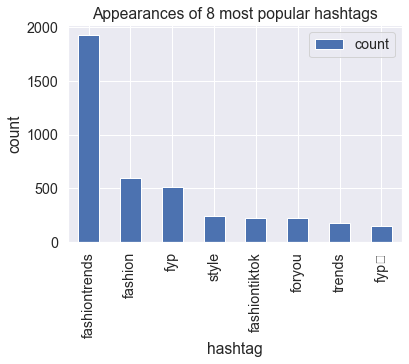

In [11]:
import matplotlib.pyplot as plt

# plotting popular hashtags
df_popular_hashtags.head(8).plot(kind='bar', x='hashtag', y='count')
plt.xlabel('hashtag')
plt.ylabel('count')
plt.title('Appearances of 8 most popular hashtags')
plt.show()

In [12]:
# dropping #fashiontrends hashtag
df_popular_hashtags.drop(index=df_popular_hashtags.index[0], 
        axis=0, 
        inplace=True)

In [13]:
# popular hashtags without #fashiontrends (since all videos have them)
df_popular_hashtags.head()

,hashtag,count
1,fashion,597
2,fyp,511
3,style,242
4,fashiontiktok,230
5,foryou,222


In [14]:
# hashtags which appear at least 100 times
at_least_100 = 100

# popular hashtags into a set
pop_hashtags_set = set(df_popular_hashtags[
                           df_popular_hashtags['count']>=at_least_100
                           ]['hashtag'])

In [15]:
# popular hashtags column
df_hashtags['popularHashtags'] = df_hashtags['hashtag'].apply(
            lambda hashtag_list: [hashtag for hashtag in hashtag_list
                                  if hashtag in pop_hashtags_set])
# drop rows without popular hashtag
df_popular_hashtags = df_hashtags.loc[
            df_hashtags['popularHashtags'].apply(lambda hashtag_list: hashtag_list !=[])]

In [16]:
# new dataframe
hashtag_vec = df_popular_hashtags.loc[:, ['popularHashtags']]


for hashtag in pop_hashtags_set:
    # make columns to encode presence of hashtags
    hashtag_vec['{}'.format(hashtag)] = hashtag_vec['popularHashtags'].apply(
        lambda hashtag_list: int(hashtag in hashtag_list))

In [17]:
# drop the popularHashtags column
hashtag_mat = hashtag_vec.drop('popularHashtags', axis=1)

/Users/anjalitanna/opt/miniconda3/lib/python3.8/site-packages/seaborn/utils.py:95: UserWarning: Glyph 12471 (\N{KATAKANA LETTER SI}) missing from current font.
  fig.canvas.draw()
/Users/anjalitanna/opt/miniconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12471 (\N{KATAKANA LETTER SI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


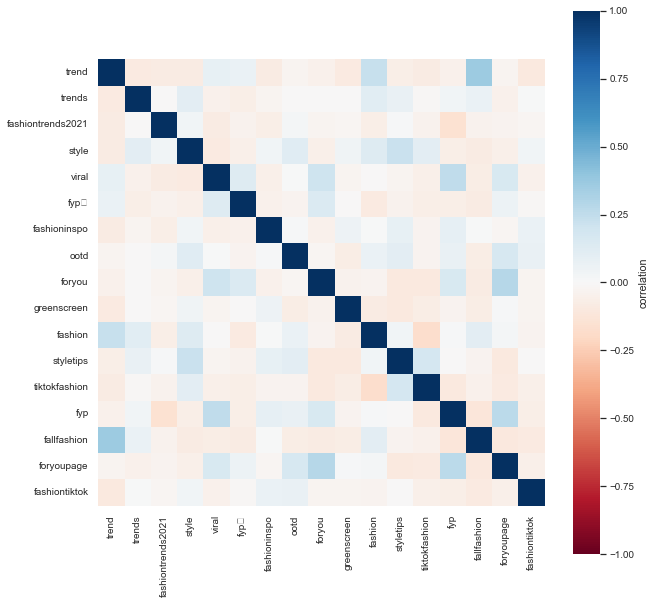

In [18]:
# correlation matrix
corr_mat = hashtag_mat.corr()

# plot the correlation matrix
sns.set(font_scale=0.9)
plt.figure(figsize=(10, 10))
sns.heatmap(corr_mat,
    cmap='RdBu',
    vmin=-1,
    vmax=1,
    square = True,
    cbar_kws={'label':'correlation'})
plt.show()

Positive values, shown in blue, indicate that the hashtags tend to appear in the same videos. For example, the row (or column) describing the hashtag `fashiontiktok` shows that it is often in videos with:
- `fashioninspo`
- `style`
- `trends`
- `ootd`

However, `fashiontiktok` often do not also belong to the following categories:
- `fallfashion`
- `fyp`
- `tiktokfashion`
- `foryoupage`

In the future, we plan to use specific hashtags that are most commonly used together and compare their view count, like count, share count, and comment count. This would be done to determine the popularity of those videos and potentially let companies know which hashtags to use together in order to receive the most interaction with their videos.

## Machine Learning

Through this project, we expect to identify features that can help make a TikTok video popular. 

We’ve identified some features like duration, hashtags, number of hashtags, that we think can make a video popular or are correlated with being popular, and would like to test our hypotheses using regression analysis. 

In [20]:
df_tiktok['hashtag']

0                           [fashionhacks, fashiontrends]
1       [@clairelatour, tiktokfashion, mode, conseilsm...
2       [fashiontrends, fashiontrends2021, 2022fashion...
3       [falltrends2021, fashiontrends2021, fashiontre...
4       [clubkid, fashiontrends, trendcycle, fashioncy...
                              ...                        
1912    [asianfashion, streetstyle, fashiontrends, cut...
1913    [pintrestfashion, outfitideas, pintrest, style...
1914    [foryoupage, foryou, fashiontrends, veryblackf...
1915    [fashion, 2022trends, fashiontrends, pradainte...
1916    [pintrestfashion, outfitideas, pintrest, style...
Name: hashtag, Length: 1917, dtype: object

In [22]:
df_tiktok['duration (s)']

0       31.0
1       14.0
2       10.0
3       46.0
4       27.0
        ... 
1912    10.0
1913    53.0
1914    14.0
1915    11.0
1916    35.0
Name: duration (s), Length: 1917, dtype: float64

We chose not to use a classifier because popularity would be better predicted continuously rather than in discrete categories. 

We will run a regression test on duration vs number of views and another one on the number of hashtags vs number of views. 